 ## FedEx Smart Hackathon 2025 🚀
---
**ReImagening DCA management using Data & Ml**

- This notebook presents beginner friendly prototype for managing Debt Collection Agencies (DCA) workflows using data analysis and machine learning concepts.

## Problem Understanding 📝
---
- FedEx currently manages overdue customer accounts through manual workflows using emails or excel sheets.
- This leads to poor accountability, delayed process and unable to deliever visible analytics.
- Feedback delays and inefficient recoveries is also the major issue.

**The Objective** is to design an intutive DCA management System which :

- Centralize the case allocations and improve performance efficiency.
- Provides a dashboard for visual representations.
- Automative SOP driven workflow which manages the accountability.
- Manages overall structured collaboration with DCA.


## Data set Used 📊
---
- A public credit risk dataset from **Kaggle** is used to simulate debt collection cases.

- Although it is not real FedEx dataset but it contains attributes like loan amount, credit history, and loan status, which closely relates to overdue and recovery scenarios. 

## Planned Workflow 🪜
---
1. Data set Loading and Exploration

2. Simulate DCA case tracking and prioritization

3. Create Analytical dashboards

4. Apply Machine Learning models for recovery prediction

5. Discuss results and future improvements

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('credit_risk_dataset.csv')
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## 📊 Data Overview and Target Variable
---
- The dataset includes 32,581 records with attributes like demographic, financial and credit history.
- The column **loans_status** is the target variable which is used to represent whether case is recovered or not.


In [4]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [5]:
df['loan_status'].value_counts(normalize=True)*100

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64

## Target Variable Distribution Insight
---
- The target variable **loan_status** shows high imbalance in which approximately 78% cases are not recovered and only about 22% cases are recovered.
- This reflects real-world case scenario where successful recovery is not frequent.
- This imbalance is important to consider while evaluating ML models.

In [6]:
df.select_dtypes(include=['int64', 'float64']).describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Key Data observation

- Some numeric features such as **age** ,**employment length** and **income** contain extreme values, indicating the presence of outliers.
- This reflects challenges of real world financial data.
- Features like **loan amount** ,**interest rate**, **loan-to-income ratio** and **credit history length** appear
highly relevant for assessing recovery risk and prioritizing cases.

In [7]:
df.select_dtypes('object').nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [8]:
agencies = ['DCA_A', 'DCA_B', 'DCA_C']
df['agency'] = np.random.choice(agencies, size= len(df))
df['case_status'] = 'Open'
df[['agency', 'case_status']].head()

,agency,case_status
0,DCA_A,Open
1,DCA_C,Open
2,DCA_A,Open
3,DCA_A,Open
4,DCA_B,Open


In [9]:
def assign_priority(row):
    if (row['loan_amnt'] > 15000) or (row['loan_percent_income'] > 0.30) :
        return 'High'
    else: 
        return 'Normal'

df['priority'] = df.apply(assign_priority, axis = 1)

df['priority'].value_counts()
df[['loan_amnt', 'loan_percent_income', 'priority']].head()

,loan_amnt,loan_percent_income,priority
0,35000,0.59,High
1,1000,0.10,Normal
2,5500,0.57,High
3,35000,0.53,High
4,35000,0.55,High


In [10]:
df['days_overdue'] = np.random.randint(1,181, size= len(df))

df['days_overdue'].describe()
df[['days_overdue', 'priority']].head()

,days_overdue,priority
0,2,High
1,131,Normal
2,99,High
3,123,High
4,21,High


In [11]:
def update_case_status(row):
    if row['loan_status'] == 1 :
        return 'Closed'
    
    elif (row['priority'] == 'High') or (row['days_overdue'] > 90):
        return 'In Progress'
    
    else:
        return 'Open'

df['case_status'] = df.apply(update_case_status, axis = 1)

df['case_status'].value_counts()
df[['loan_status', 'priority', 'days_overdue', 'case_status']].head(10)



,loan_status,priority,days_overdue,case_status
0,1,High,2,Closed
1,0,Normal,131,In Progress
2,1,High,99,Closed
3,1,High,123,Closed
4,1,High,21,Closed
5,1,Normal,81,Closed
6,1,High,92,Closed
7,1,High,162,Closed
8,1,High,56,Closed
9,1,Normal,72,Closed


## Exploratory Analysis and Operational Dashboards
---

### Case Status Distribution

- This Visualization helps to understand what is the current status of the different cases.
- **Open**, **Closed** and **In Progress** are the distinct categories used to divide cases.
- This help in better observation of each cases and centralizing the whole information.



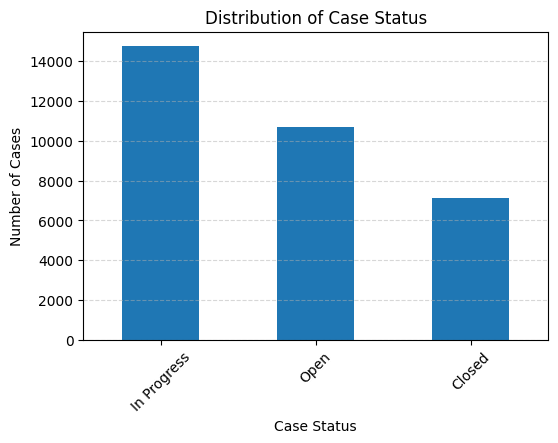

In [12]:
import matplotlib.pyplot as plt

case_counts = df['case_status'].value_counts()

plt.figure(figsize=(6,4))
case_counts.plot(kind='bar')
plt.title('Distribution of Case Status')
plt.xlabel('Case Status')
plt.ylabel('Number of Cases')
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle = '--', alpha = 0.5 )
plt.show()

### Insight

- Majority of cases are under **In Progress** or **Open** Category.
- This shows how the workflow is pushing cases for processing and not leaving them to be idle.

---

### Workload Distribution across different DCA agencies

- This Chart represents how cases are distributed among the agencies.
- It shows centralized view of agency-level workload.

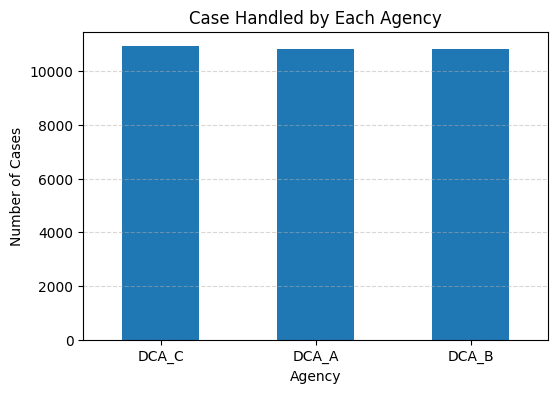

In [13]:
agency_counts = df['agency'].value_counts()

plt.figure(figsize=(6,4))
agency_counts.plot(kind='bar')
plt.title('Case Handled by Each Agency')
plt.xlabel('Agency')
plt.ylabel('Number of Cases')
plt.xticks(rotation = 0)
plt.grid(axis='y', linestyle = '--', alpha = 0.5)

plt.show()

### Insight

- Cases are evenly distributed across agencies in this prototype, demonstrating balanced allocation.
- In a real system, this could be optimized based on agency performance or capacity.

---


### Case Priority Distribution

- This visualization highlights the proportion of high-priority versus normal-priority cases. 
- This is essential for risk-based prioritization and escalation.

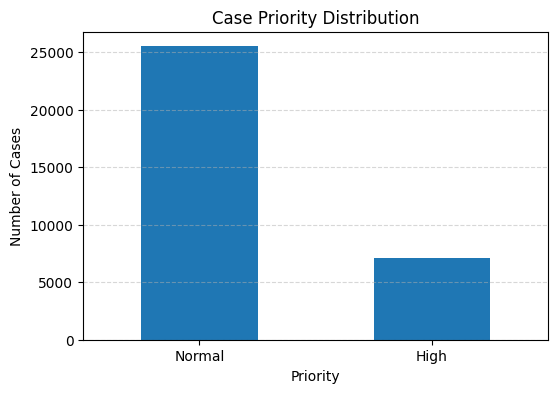

In [14]:
priority_counts = df['priority'].value_counts()

plt.figure(figsize=(6,4))
priority_counts.plot(kind='bar')
plt.title('Case Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Number of Cases')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

plt.show()

### Insight

- There is huge imbalance between priority as majority of cases are in **Normal** category.
- This serves as the basis for recovery stratergies.

---

### Overdue Ageing Analysis

- This histogram illustrates how overdue cases are spread across different time periods. 
- It helps identify long-pending cases that require escalation.

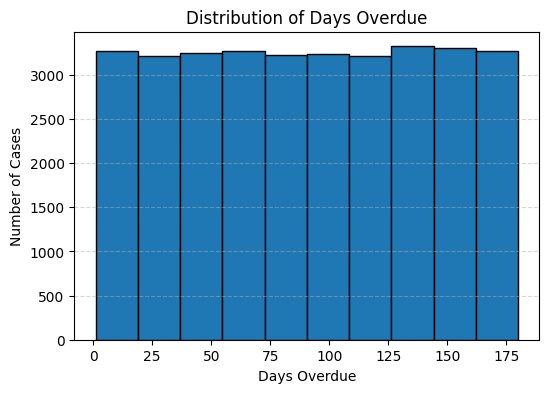

In [15]:
plt.figure(figsize=(6,4))

plt.hist(df['days_overdue'], bins = 10, edgecolor = 'black')

plt.title('Distribution of Days Overdue')
plt.xlabel('Days Overdue')
plt.ylabel('Number of Cases')

plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.show()

### Insight

- The ageing distribution shows cases across short-term and long-term overdue ranges.
- There are uniformity in the overall ageing of cases in durations showcasing importance of debt recovery operation.

## Machine Learning for Recovery Prediction
---
- To enhance decision-making, a machine learning model is applied to predict loan recovery status based on customer profile, loan attributes, and credit history. 
- This helps identify  cases with higher likelihood of recovery and supports prioritization strategies.


In [16]:
features = ['person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'days_overdue'
]

x = df[features]
y = df['loan_status']

In [17]:
x = x.fillna(x.median())

## Data Cleaning & Assumptions
---
To keep the solution practical and reproducible, the following assumptions were made:

### Assumptions
- Missing numerical values were imputed using the median to avoid bias from extreme values.
- Synthetic fields such as `days_overdue`, `priority`, and `case_status` were created to simulate real-world DCA operations.
---

### Divding Data Set

- In order to train and test model effectively the `train_test_split` is applied
- The entire data is dividen in **4:1** ratio in which 80% is for training the model and rest for evaluating.

In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


## Machine Learning Approach
---
A **Decision Tree Classifier** was chosen as the primary model due to:
- High interpretability
- Ability to handle non-linear relationships
- Clear feature importance extraction

The model is not intended for production deployment but rather to:

- Identify key factors influencing loan default
- Support prioritization logic used by DCAs


In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5, random_state = 42)

model.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [20]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8600583090379009

In [21]:
feature_importance = pd.Series(model.feature_importances_, index = features).sort_values(ascending=False)
feature_importance

loan_percent_income           0.521302
loan_int_rate                 0.298677
person_income                 0.143522
person_emp_length             0.034326
loan_amnt                     0.001888
cb_person_cred_hist_length    0.000284
person_age                    0.000000
days_overdue                  0.000000
dtype: float64

## Model Insights
---
- The decision tree model highlights key drivers of loan recovery, including overdue duration, loan amount, and income-related factors.
- These insights can support smarter prioritization and recovery strategies in an automated DCA system.

**Note**

- The feature `days_overdue` shows negligible importance in the machine learning model because it was synthetically generated for workflow simulation. 
- However, it remains a critical operational feature for rule-based prioritization and escalation logic.


### Visualization Of Feature Importance
---

- To enhance interpretibility of individual features influence on final prediction.
- A horizontal bar graph will be used which clearly divides features importances into valuable insight. 

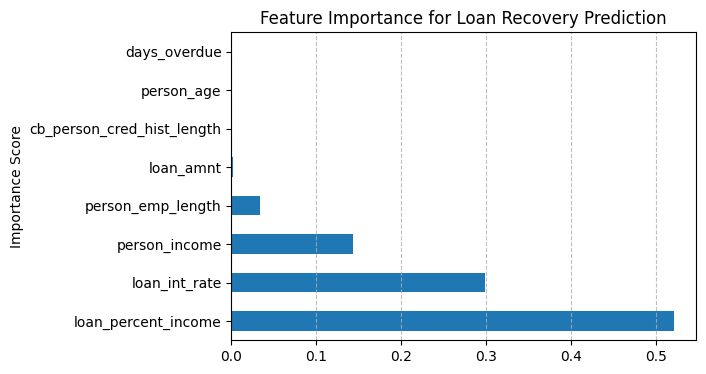

In [22]:
plt.figure(figsize=(6,4))
feature_importance.plot(kind='barh')
plt.title('Feature Importance for Loan Recovery Prediction')
plt.ylabel('Importance Score')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.show()


## Random Forest Model for Recovery Prediction (Optional Enhancement)
---
- To explore potential performance improvement, a Random Forest model is evaluated. 
- Random Forest combines multiple decision trees to improve prediction robustness and reduce overfitting.


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 8, random_state = 42, n_jobs = -1)

rf_model.fit(x_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [24]:
from sklearn.metrics import accuracy_score

rf_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)

accuracy

0.8597514193647384

### Model Comparision and Selection
---
- Both the `Decision Tree` and `Random Forest` were evaluated for loan recovery prediction.
- The **Accuracy** of Decision Tree was slightly `Higher` than that of Random Forest.
- Decision Tree give better interpretibility therefore, it is selected as the final model for this prototype.


### Future Improvements
---
- The dataset is simulated and not actual FedEx operational data.
- Case assignment and status logic are rule-based.
- The model is not optimized for production-scale deployment.
- No real-time integration or external system connectivity is implemented.

## Conclusion
---
This project demonstrates how a manual debt collection process can be transformed into a structured, automated workflow using data analytics and machine learning.

The solution:
- Centralizes loan case information
- Enables prioritization of overdue cases
- Provides transparency through visual dashboards
- Supports decision-making with interpretable ML models

This prototype aligns with FedEx Smart Hackathon objectives and serves as a strong foundation for further system enhancement.
